In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df1 = pd.read_excel('Test_set.xlsx')
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
data = df.append(df1, sort=False)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
data.shape

(13354, 11)

In [8]:
data.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [9]:
final_data = data.copy()

In [12]:
data[['Date', 'Month', 'Year']] = data.Date_of_Journey.str.split('/', expand=True)

In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [16]:
data.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [17]:
data['Route1'] = data['Route'].str.split('→ ').str[0]
data['Route2'] = data['Route'].str.split('→ ').str[1]
data['Route3'] = data['Route'].str.split('→ ').str[2]
data['Route4'] = data['Route'].str.split('→ ').str[3]
data['Route5'] = data['Route'].str.split('→ ').str[4]

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019,BLR,DEL,NaN,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,CCU,NAG,BLR,NaN,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,BLR,NAG,DEL,NaN,NaN


In [19]:
data.isna().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  1
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            1
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Route1                 1
Route2                 1
Route3              4341
Route4             11397
Route5             13296
dtype: int64

In [20]:
data['Route1'].fillna('None',inplace=True)
data['Route2'].fillna('None',inplace=True)
data['Route3'].fillna('None',inplace=True)
data['Route4'].fillna('None',inplace=True)
data['Route5'].fillna('None',inplace=True)

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019,BLR,DEL,None,None,None
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,None
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,None
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,CCU,NAG,BLR,None,None
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,BLR,NAG,DEL,None,None


In [22]:
data.drop(['Date_of_Journey','Route'], axis=1, inplace=True)

In [23]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,BLR,NAG,DEL,None,None


In [24]:
data[['Dep_hour', 'Dep_minute']] = data.Dep_Time.str.split(':', expand=True)

In [25]:
data[['Arrival_Hour', 'Arrival_Minute']] = data.Arrival_Time.str.split(':', expand=True)

In [26]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,...,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,...,2019,BLR,DEL,None,None,None,22,20,01,10 22 Mar
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,...,2019,CCU,IXR,BBI,BLR,None,05,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,...,2019,DEL,LKO,BOM,COK,None,09,25,04,25 10 Jun
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,...,2019,CCU,NAG,BLR,None,None,18,05,23,30
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,...,2019,BLR,NAG,DEL,None,None,16,50,21,35


In [27]:
data['Arrival_Minute'] = data.Arrival_Minute.str.split(' ', expand=True)

In [28]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,...,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,...,2019,BLR,DEL,None,None,None,22,20,01,10
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,...,2019,CCU,IXR,BBI,BLR,None,05,50,13,15
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,...,2019,DEL,LKO,BOM,COK,None,09,25,04,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,...,2019,CCU,NAG,BLR,None,None,18,05,23,30
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,...,2019,BLR,NAG,DEL,None,None,16,50,21,35


In [29]:
data.drop(['Dep_Time','Arrival_Time'], axis=1, inplace=True)

In [30]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,03,2019,BLR,DEL,None,None,None,22,20,01,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,None,05,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,None,09,25,04,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,12,05,2019,CCU,NAG,BLR,None,None,18,05,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,01,03,2019,BLR,NAG,DEL,None,None,16,50,21,35


In [31]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,05,2019,None,None,None,None,None,09,45,09,25


In [32]:
data['Total_Stops'].fillna('1 stop', inplace=True)

In [33]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute


In [34]:
data['Total_Stops'].replace('non-stop', '0 stop', inplace=True)

In [35]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0 stop,No info,3897.0,24,03,2019,BLR,DEL,None,None,None,22,20,01,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,None,05,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,None,09,25,04,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,12,05,2019,CCU,NAG,BLR,None,None,18,05,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,01,03,2019,BLR,NAG,DEL,None,None,16,50,21,35


In [36]:
data['Stops'] = data.Total_Stops.str.split(' ').str[0]

In [37]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute,Stops
0,IndiGo,Banglore,New Delhi,2h 50m,0 stop,No info,3897.0,24,03,2019,BLR,DEL,None,None,None,22,20,01,10,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,None,05,50,13,15,2
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,None,09,25,04,25,2
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218.0,12,05,2019,CCU,NAG,BLR,None,None,18,05,23,30,1
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302.0,01,03,2019,BLR,NAG,DEL,None,None,16,50,21,35,1


In [38]:
data.drop(['Duration','Total_Stops'], axis=1, inplace=True)

In [39]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute,Stops
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,03,2019,BLR,DEL,None,None,None,22,20,01,10,0
1,Air India,Kolkata,Banglore,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,None,05,50,13,15,2
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,None,09,25,04,25,2
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,05,2019,CCU,NAG,BLR,None,None,18,05,23,30,1
4,IndiGo,Banglore,New Delhi,No info,13302.0,01,03,2019,BLR,NAG,DEL,None,None,16,50,21,35,1


In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [42]:
data['Airline'] = encoder.fit_transform(data['Airline'])
data['Source'] = encoder.fit_transform(data['Source'])
data['Destination'] = encoder.fit_transform(data['Destination'])
data['Additional_Info'] = encoder.fit_transform(data['Additional_Info'])
data['Route1'] = encoder.fit_transform(data['Route1'])
data['Route2'] = encoder.fit_transform(data['Route2'])
data['Route3'] = encoder.fit_transform(data['Route3'])
data['Route4'] = encoder.fit_transform(data['Route4'])
data['Route5'] = encoder.fit_transform(data['Route5'])

In [43]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute,Stops
0,3,0,5,8,3897.0,24,03,2019,0,13,24,12,4,22,20,01,10,0
1,1,3,0,8,7662.0,1,05,2019,2,25,1,3,4,05,50,13,15,2
2,4,2,1,8,13882.0,9,06,2019,3,32,4,5,4,09,25,04,25,2
3,3,3,0,8,6218.0,12,05,2019,2,34,3,12,4,18,05,23,30,1
4,3,0,5,8,13302.0,01,03,2019,0,34,8,12,4,16,50,21,35,1


In [44]:
data.shape

(13354, 18)

In [45]:
data.isna().sum()

Airline               0
Source                0
Destination           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Route1                0
Route2                0
Route3                0
Route4                0
Route5                0
Dep_hour              0
Dep_minute            0
Arrival_Hour          0
Arrival_Minute        0
Stops                 0
dtype: int64

In [46]:
data['Price'].fillna(data['Price'].mean(), inplace=True)

In [47]:
data.isna().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
Dep_hour           0
Dep_minute         0
Arrival_Hour       0
Arrival_Minute     0
Stops              0
dtype: int64

In [48]:
data.dtypes

Airline              int64
Source               int64
Destination          int64
Additional_Info      int64
Price              float64
Date                object
Month               object
Year                object
Route1               int64
Route2               int64
Route3               int64
Route4               int64
Route5               int64
Dep_hour            object
Dep_minute          object
Arrival_Hour        object
Arrival_Minute      object
Stops               object
dtype: object

In [49]:
data['Date'] = data['Date'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)
data['Dep_hour'] = data['Dep_hour'].astype(int)
data['Dep_minute'] = data['Dep_minute'].astype(int)
data['Arrival_Hour'] = data['Arrival_Hour'].astype(int)
data['Arrival_Minute'] = data['Arrival_Minute'].astype(int)
data['Stops'] = data['Stops'].astype(int)

In [50]:
data.dtypes

Airline              int64
Source               int64
Destination          int64
Additional_Info      int64
Price              float64
Date                 int64
Month                int64
Year                 int64
Route1               int64
Route2               int64
Route3               int64
Route4               int64
Route5               int64
Dep_hour             int64
Dep_minute           int64
Arrival_Hour         int64
Arrival_Minute       int64
Stops                int64
dtype: object

In [51]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute,Stops
0,3,0,5,8,3897.0,24,3,2019,0,13,24,12,4,22,20,1,10,0
1,1,3,0,8,7662.0,1,5,2019,2,25,1,3,4,5,50,13,15,2
2,4,2,1,8,13882.0,9,6,2019,3,32,4,5,4,9,25,4,25,2
3,3,3,0,8,6218.0,12,5,2019,2,34,3,12,4,18,5,23,30,1
4,3,0,5,8,13302.0,1,3,2019,0,34,8,12,4,16,50,21,35,1


In [53]:
x = data.drop('Price', axis=1)
y = data.Price

In [54]:
x.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Year,Route1,Route2,Route3,Route4,Route5,Dep_hour,Dep_minute,Arrival_Hour,Arrival_Minute,Stops
0,3,0,5,8,24,3,2019,0,13,24,12,4,22,20,1,10,0
1,1,3,0,8,1,5,2019,2,25,1,3,4,5,50,13,15,2
2,4,2,1,8,9,6,2019,3,32,4,5,4,9,25,4,25,2
3,3,3,0,8,12,5,2019,2,34,3,12,4,18,5,23,30,1
4,3,0,5,8,1,3,2019,0,34,8,12,4,16,50,21,35,1


In [55]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [57]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(9347, 17) (9347,)
(4007, 17) (4007,)


In [58]:
feature_select = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_select.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [59]:
feature_select.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [61]:
selected_features = x_train.columns[(feature_select.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5', 'Dep_hour',
       'Dep_minute', 'Arrival_Hour', 'Arrival_Minute', 'Stops'],
      dtype='object')

In [63]:
x_train.drop(['Year'], axis=1, inplace=True)
x_test.drop(['Year'], axis=1, inplace=True)

/Users/abhinay/Desktop/Tools/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(9347, 16) (9347,)
(4007, 16) (4007,)


In [65]:
import tensorflow as tf

In [66]:
tf.__version__

'2.3.0'

In [69]:
keras.__version__

'2.4.0'

In [70]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, ReLU, LeakyReLU, Dropout

In [71]:
model = Sequential()

In [73]:
model.add(Dense(units=16,kernel_initializer='normal', input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=8,kernel_initializer='normal', activation='relu'))
model.add(Dense(units=1, kernel_initializer='normal'))

In [74]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])

In [75]:
model_history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=50)

Epoch 1/50
234/234 [==============================] - 1s 2ms/step - loss: 97705640.0000 - mae: 8943.5684 - val_loss: 85788280.0000 - val_mae: 8358.6416
Epoch 2/50
234/234 [==============================] - 0s 1ms/step - loss: 59944740.0000 - mae: 6381.4448 - val_loss: 30484878.0000 - val_mae: 4320.0425
Epoch 3/50
234/234 [==============================] - 0s 1ms/step - loss: 27929634.0000 - mae: 3984.2332 - val_loss: 22253622.0000 - val_mae: 3651.2014
Epoch 4/50
234/234 [==============================] - 0s 1ms/step - loss: 25573922.0000 - mae: 3796.5891 - val_loss: 21338772.0000 - val_mae: 3560.2671
Epoch 5/50
234/234 [==============================] - 0s 1ms/step - loss: 24573174.0000 - mae: 3717.3701 - val_loss: 20592688.0000 - val_mae: 3475.4009
Epoch 6/50
234/234 [==============================] - 0s 1ms/step - loss: 23683730.0000 - mae: 3617.5769 - val_loss: 19829732.0000 - val_mae: 3395.4905
Epoch 7/50
234/234 [==============================] - 0s 1ms/step - loss: 23112136.0000 

In [77]:
model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [78]:
# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               6

In [79]:
model_history1 = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
234/234 [==============================] - 2s 9ms/step - loss: 3033.7258 - mean_absolute_error: 3033.7258 - val_loss: 2508.8831 - val_mean_absolute_error: 2508.8831
Epoch 2/500
234/234 [==============================] - 1s 6ms/step - loss: 2745.7026 - mean_absolute_error: 2745.7026 - val_loss: 2618.7859 - val_mean_absolute_error: 2618.7859
Epoch 3/500
234/234 [==============================] - 2s 6ms/step - loss: 2745.2954 - mean_absolute_error: 2745.2954 - val_loss: 2564.0830 - val_mean_absolute_error: 2564.0830
Epoch 4/500
234/234 [==============================] - 2s 8ms/step - loss: 2715.4287 - mean_absolute_error: 2715.4287 - val_loss: 2490.4314 - val_mean_absolute_error: 2490.4314
Epoch 5/500
234/234 [==============================] - 2s 7ms/step - loss: 2742.7812 - mean_absolute_error: 2742.7812 - val_loss: 2688.1318 - val_mean_absolute_error: 2688.1318
Epoch 6/500
234/234 [==============================] - 2s 7ms/step - loss: 2743.9172 - mean_absolute_error: 2743.91

234/234 [==============================] - 1s 6ms/step - loss: 2574.3989 - mean_absolute_error: 2574.3989 - val_loss: 2397.7944 - val_mean_absolute_error: 2397.7944
Epoch 48/500
234/234 [==============================] - 2s 7ms/step - loss: 2586.3379 - mean_absolute_error: 2586.3379 - val_loss: 2396.8435 - val_mean_absolute_error: 2396.8435
Epoch 49/500
234/234 [==============================] - 2s 9ms/step - loss: 2581.5283 - mean_absolute_error: 2581.5283 - val_loss: 2392.9412 - val_mean_absolute_error: 2392.9412
Epoch 50/500
234/234 [==============================] - 2s 8ms/step - loss: 2593.7197 - mean_absolute_error: 2593.7197 - val_loss: 2392.6638 - val_mean_absolute_error: 2392.6638
Epoch 51/500
234/234 [==============================] - 2s 6ms/step - loss: 2599.0789 - mean_absolute_error: 2599.0789 - val_loss: 2407.2217 - val_mean_absolute_error: 2407.2217
Epoch 52/500
234/234 [==============================] - 2s 7ms/step - loss: 2550.3655 - mean_absolute_error: 2550.3655 - va

234/234 [==============================] - 1s 6ms/step - loss: 2308.1436 - mean_absolute_error: 2308.1436 - val_loss: 2285.1057 - val_mean_absolute_error: 2285.1057
Epoch 94/500
234/234 [==============================] - 1s 6ms/step - loss: 2315.4382 - mean_absolute_error: 2315.4382 - val_loss: 2284.0903 - val_mean_absolute_error: 2284.0903
Epoch 95/500
234/234 [==============================] - 1s 6ms/step - loss: 2313.1418 - mean_absolute_error: 2313.1418 - val_loss: 2280.2305 - val_mean_absolute_error: 2280.2305
Epoch 96/500
234/234 [==============================] - 1s 6ms/step - loss: 2317.2271 - mean_absolute_error: 2317.2271 - val_loss: 2275.0762 - val_mean_absolute_error: 2275.0762
Epoch 97/500
234/234 [==============================] - 1s 6ms/step - loss: 2302.5728 - mean_absolute_error: 2302.5728 - val_loss: 2278.2412 - val_mean_absolute_error: 2278.2412
Epoch 98/500
234/234 [==============================] - 1s 6ms/step - loss: 2310.5098 - mean_absolute_error: 2310.5098 - va

Epoch 139/500
234/234 [==============================] - 1s 6ms/step - loss: 2252.1353 - mean_absolute_error: 2252.1353 - val_loss: 2228.7432 - val_mean_absolute_error: 2228.7432
Epoch 140/500
234/234 [==============================] - 1s 6ms/step - loss: 2256.4343 - mean_absolute_error: 2256.4343 - val_loss: 2235.2815 - val_mean_absolute_error: 2235.2815
Epoch 141/500
234/234 [==============================] - 1s 6ms/step - loss: 2232.6558 - mean_absolute_error: 2232.6558 - val_loss: 2227.7798 - val_mean_absolute_error: 2227.7798
Epoch 142/500
234/234 [==============================] - 1s 6ms/step - loss: 2233.6423 - mean_absolute_error: 2233.6423 - val_loss: 2229.9937 - val_mean_absolute_error: 2229.9937
Epoch 143/500
234/234 [==============================] - 1s 6ms/step - loss: 2239.3809 - mean_absolute_error: 2239.3809 - val_loss: 2230.0281 - val_mean_absolute_error: 2230.0281
Epoch 144/500
234/234 [==============================] - 1s 6ms/step - loss: 2243.9409 - mean_absolute_er

Epoch 185/500
234/234 [==============================] - 1s 6ms/step - loss: 2233.9141 - mean_absolute_error: 2233.9141 - val_loss: 2200.2017 - val_mean_absolute_error: 2200.2017
Epoch 186/500
234/234 [==============================] - 1s 6ms/step - loss: 2229.0652 - mean_absolute_error: 2229.0652 - val_loss: 2218.5557 - val_mean_absolute_error: 2218.5557
Epoch 187/500
234/234 [==============================] - 1s 6ms/step - loss: 2217.5388 - mean_absolute_error: 2217.5388 - val_loss: 2210.3777 - val_mean_absolute_error: 2210.3777
Epoch 188/500
234/234 [==============================] - 1s 6ms/step - loss: 2216.7952 - mean_absolute_error: 2216.7952 - val_loss: 2201.5925 - val_mean_absolute_error: 2201.5925
Epoch 189/500
234/234 [==============================] - 2s 7ms/step - loss: 2219.1440 - mean_absolute_error: 2219.1440 - val_loss: 2215.5364 - val_mean_absolute_error: 2215.5364
Epoch 190/500
234/234 [==============================] - 1s 6ms/step - loss: 2225.5698 - mean_absolute_er

Epoch 231/500
234/234 [==============================] - 1s 6ms/step - loss: 2215.3115 - mean_absolute_error: 2215.3115 - val_loss: 2191.6436 - val_mean_absolute_error: 2191.6436
Epoch 232/500
234/234 [==============================] - 1s 6ms/step - loss: 2205.4722 - mean_absolute_error: 2205.4722 - val_loss: 2181.4785 - val_mean_absolute_error: 2181.4785
Epoch 233/500
234/234 [==============================] - 1s 6ms/step - loss: 2200.4192 - mean_absolute_error: 2200.4192 - val_loss: 2231.9233 - val_mean_absolute_error: 2231.9233
Epoch 234/500
234/234 [==============================] - 2s 7ms/step - loss: 2202.4192 - mean_absolute_error: 2202.4192 - val_loss: 2203.2046 - val_mean_absolute_error: 2203.2046
Epoch 235/500
234/234 [==============================] - 1s 6ms/step - loss: 2215.4893 - mean_absolute_error: 2215.4893 - val_loss: 2182.4583 - val_mean_absolute_error: 2182.4583
Epoch 236/500
234/234 [==============================] - 1s 6ms/step - loss: 2214.2444 - mean_absolute_er

Epoch 277/500
234/234 [==============================] - 1s 6ms/step - loss: 2193.0989 - mean_absolute_error: 2193.0989 - val_loss: 2177.6519 - val_mean_absolute_error: 2177.6519
Epoch 278/500
234/234 [==============================] - 1s 6ms/step - loss: 2202.3193 - mean_absolute_error: 2202.3193 - val_loss: 2224.7217 - val_mean_absolute_error: 2224.7217
Epoch 279/500
234/234 [==============================] - 1s 6ms/step - loss: 2190.7224 - mean_absolute_error: 2190.7224 - val_loss: 2163.1194 - val_mean_absolute_error: 2163.1194
Epoch 280/500
234/234 [==============================] - 1s 6ms/step - loss: 2201.2051 - mean_absolute_error: 2201.2051 - val_loss: 2177.1287 - val_mean_absolute_error: 2177.1287
Epoch 281/500
234/234 [==============================] - 1s 6ms/step - loss: 2188.2954 - mean_absolute_error: 2188.2954 - val_loss: 2172.6147 - val_mean_absolute_error: 2172.6147
Epoch 282/500
234/234 [==============================] - 1s 6ms/step - loss: 2197.6497 - mean_absolute_er

Epoch 323/500
234/234 [==============================] - 1s 6ms/step - loss: 2163.3894 - mean_absolute_error: 2163.3894 - val_loss: 2121.6638 - val_mean_absolute_error: 2121.6638
Epoch 324/500
234/234 [==============================] - 1s 6ms/step - loss: 2159.0835 - mean_absolute_error: 2159.0835 - val_loss: 2134.3943 - val_mean_absolute_error: 2134.3943
Epoch 325/500
234/234 [==============================] - 1s 6ms/step - loss: 2162.7483 - mean_absolute_error: 2162.7483 - val_loss: 2116.4407 - val_mean_absolute_error: 2116.4407
Epoch 326/500
234/234 [==============================] - 1s 6ms/step - loss: 2151.9836 - mean_absolute_error: 2151.9836 - val_loss: 2152.7859 - val_mean_absolute_error: 2152.7859
Epoch 327/500
234/234 [==============================] - 1s 6ms/step - loss: 2159.8977 - mean_absolute_error: 2159.8977 - val_loss: 2126.1113 - val_mean_absolute_error: 2126.1113
Epoch 328/500
234/234 [==============================] - 2s 7ms/step - loss: 2168.7407 - mean_absolute_er

Epoch 369/500
234/234 [==============================] - 2s 8ms/step - loss: 2121.5142 - mean_absolute_error: 2121.5142 - val_loss: 2085.8540 - val_mean_absolute_error: 2085.8540
Epoch 370/500
234/234 [==============================] - 2s 9ms/step - loss: 2134.0710 - mean_absolute_error: 2134.0710 - val_loss: 2091.9109 - val_mean_absolute_error: 2091.9109
Epoch 371/500
234/234 [==============================] - 2s 7ms/step - loss: 2119.4565 - mean_absolute_error: 2119.4565 - val_loss: 2091.5569 - val_mean_absolute_error: 2091.5569
Epoch 372/500
234/234 [==============================] - 2s 10ms/step - loss: 2114.1606 - mean_absolute_error: 2114.1606 - val_loss: 2085.8884 - val_mean_absolute_error: 2085.8884
Epoch 373/500
234/234 [==============================] - 3s 11ms/step - loss: 2117.1045 - mean_absolute_error: 2117.1045 - val_loss: 2094.4414 - val_mean_absolute_error: 2094.4414
Epoch 374/500
234/234 [==============================] - 1s 6ms/step - loss: 2132.8418 - mean_absolute_

Epoch 415/500
234/234 [==============================] - 2s 9ms/step - loss: 2105.9585 - mean_absolute_error: 2105.9585 - val_loss: 2194.3813 - val_mean_absolute_error: 2194.3813
Epoch 416/500
234/234 [==============================] - 2s 8ms/step - loss: 2117.6409 - mean_absolute_error: 2117.6409 - val_loss: 2089.3086 - val_mean_absolute_error: 2089.3086
Epoch 417/500
234/234 [==============================] - 2s 8ms/step - loss: 2096.9434 - mean_absolute_error: 2096.9434 - val_loss: 2074.0974 - val_mean_absolute_error: 2074.0974
Epoch 418/500
234/234 [==============================] - 1s 6ms/step - loss: 2095.1270 - mean_absolute_error: 2095.1270 - val_loss: 2054.1121 - val_mean_absolute_error: 2054.1121
Epoch 419/500
234/234 [==============================] - 1s 6ms/step - loss: 2119.4844 - mean_absolute_error: 2119.4844 - val_loss: 2139.5066 - val_mean_absolute_error: 2139.5066
Epoch 420/500
234/234 [==============================] - 1s 6ms/step - loss: 2109.7983 - mean_absolute_er

Epoch 461/500
234/234 [==============================] - 1s 6ms/step - loss: 2100.7266 - mean_absolute_error: 2100.7266 - val_loss: 2055.6443 - val_mean_absolute_error: 2055.6443
Epoch 462/500
234/234 [==============================] - 1s 6ms/step - loss: 2094.4258 - mean_absolute_error: 2094.4258 - val_loss: 2040.2372 - val_mean_absolute_error: 2040.2372
Epoch 463/500
234/234 [==============================] - 1s 6ms/step - loss: 2102.4636 - mean_absolute_error: 2102.4636 - val_loss: 2130.8850 - val_mean_absolute_error: 2130.8850
Epoch 464/500
234/234 [==============================] - 1s 6ms/step - loss: 2090.6799 - mean_absolute_error: 2090.6799 - val_loss: 2056.5027 - val_mean_absolute_error: 2056.5027
Epoch 465/500
234/234 [==============================] - 2s 7ms/step - loss: 2107.4414 - mean_absolute_error: 2107.4414 - val_loss: 2045.1461 - val_mean_absolute_error: 2045.1461
Epoch 466/500
234/234 [==============================] - 1s 6ms/step - loss: 2124.2117 - mean_absolute_er

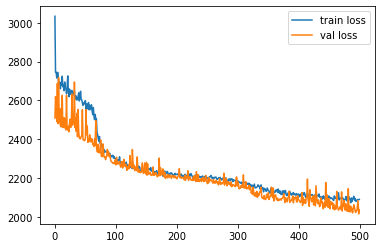

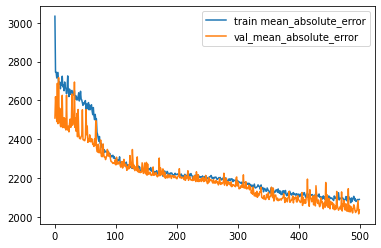

In [81]:
plt.plot(model_history1.history['loss'], label='train loss')
plt.plot(model_history1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_history1.history['mean_absolute_error'], label='train mean_absolute_error')
plt.plot(model_history1.history['val_mean_absolute_error'], label='val_mean_absolute_error')
plt.legend()
plt.show()

In [83]:
model.evaluate(x_test, y_test)

126/126 [==============================] - 0s 2ms/step - loss: 2070.3950 - mean_absolute_error: 2070.3950


[2070.39501953125, 2070.39501953125]

In [84]:
model.save('Sequential_fpp_dl.h5')

In [87]:
final_data.to_csv('FlightPrice.csv')